# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

The dataset collected is related to 17 campaigns that occurred between May 2008 and November 2010, corresponding to a total of 79354 contacts.

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [1]:
import pandas as pd

In [5]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [7]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



Data Preparation and Cleaning

Round 1: Data Cleaning
From the CRISP-DM-Bank document: 
A. Filter poutcome values to only include failure and success. 
B. Remove the sex column as it has very little importance. *This had already been done.

Additional Issues Identified:
Filter out rows with zero age.
Filter out rows with unknown values.
Remove periods (.) from education values to avoid potential issues.

For example:
basic.4y becomes basic4y
high.school becomes highschool
basic.6y becomes basic6y
basic.9y becomes basic9y
professional.course becomes professionalcourse
university.degree becomes universitydegree

Round 2: Data Preparation
1. Handling Unseen Values in education:
When running the first logistic regression, errors occurred due to unseen values in education between the training and test data sets.
Introduced stratification on education during the train-test split to ensure balanced representation:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=X['education'], random_state=42)

With introduction of 'statify' method the following performance improvments were noted during testing:
Accuracy: The accuracy improved from 83.29% to 85.42%.
Mean Squared Error: The MSE decreased from 0.1671 to 0.1458, indicating better model performance.
R-squared: The R-squared value improved from 0.1924 to 0.2432, indicating a better fit.
Class 0: Slight improvements in precision, recall, and F1-score.
Class 1: Slight decrease in recall, but overall performance remained similar.

2. Using the statify method on education did cause issues with the 'illiterate' value which only had a sample of 1. This row was dropped as not having enough samples to provide value.

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Problem: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

Engineering features for LogisticRegression

In [ ]:
#The StandardScaler is used to standardize the numeric features. 
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])


In [ ]:
#Categorical Features Encoding:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])


In [ ]:
#Pipeline Creation:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])


In [ ]:
#Post-work impute missing values in numeric columns with the median
numeric_imputer = SimpleImputer(strategy='median')
df[df.select_dtypes(include=['int64', 'float64']).columns] = numeric_imputer.fit_transform(df.select_dtypes(include=['int64', 'float64']))

#Impute missing values in categorical columns with the most frequent value
categorical_imputer = SimpleImputer(strategy='most_frequent')
df[df.select_dtypes(include=['object']).columns] = categorical_imputer.fit_transform(df.select_dtypes(include=['object']))

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [ ]:
# **Train-Test Split** 
# Stratified sampling ensures that the distribution of 'education' values is similar in both the training and test sets. 
# This is important to prevent any unseen categories during model training and evaluation. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=X['education'], random_state=42

With introduction of 'statify' method the following performance improvments were noted during testing:
Accuracy: The accuracy improved from 83.29% to 85.42%.
Mean Squared Error: The MSE decreased from 0.1671 to 0.1458, indicating better model performance.
R-squared: The R-squared value improved from 0.1924 to 0.2432, indicating a better fit.
Class 0: Slight improvements in precision, recall, and F1-score.
Class 1: Slight decrease in recall, but overall performance remained similar.

Raw:
Stratified Split Method:
Mean Squared Error (MSE): 0.1671
R-squared: 0.1924
Accaracy: 0.8329
Classification Report:
Precision, Recall, F1-Score for Class 0:
Precision: 0.88
Recall 0.89
F1-score: 0.88
Support: 796
Precision, Recall, F1-Score for Class 1:
Precision: 0.72
Recall: 0.69
F1-score: 0.71
Support: 329
Macro Average:
Precision: 0.80
Recall: 0.79
F1-score: 0.80
Weighted Average:
Precision: 0.83
Recall: 0.83
F1-score: 0.83
Handle Unknown='ignore' Method:
Mean Squared Error (MSE): 0.1458
R-squared: 0.2432
Accuracy: 0.8542
Classification Report:
Precision, Recall, F1-Score for Class 0:
Precision: 0.89
Recall: 0.92
F1-score: 0.90
Support: 832
Precision, Recall, F1-Score for Class 1:
Precision: 0.75
Recall: 0.67
F1-score: 0.70
Support: 293
Macro Average:
Precision: 0.82
Recall: 0.79
F1-score: 0.80
Weighted Average:
Precision: 0.85
Recall: 0.85
F1-score: 0.85

A Baseline Model
Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [116]:
#Baseline model using dummyclassifier

import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score

# Load the data
df = pd.read_csv('data/bank-additional-full.csv', sep=';')

# Drop rows with age equal to 0 
df = df[df['age'] != 0] 

# Drop rows with 'unknown' values in any column 
df = df[~df.isin(['unknown']).any(axis=1)]

# Remove periods from the 'education' field
df['education'] = df['education'].str.replace('.', '', regex=False)

# Filter out rows with 'illiterate' value in the 'education' field
df = df[df['education'] != 'illiterate']

# Filter the data to include only conclusive results
df = df[df['poutcome'].isin(['success', 'failure'])]

# Encode the target variable
label_encoder = LabelEncoder()
df['y'] = label_encoder.fit_transform(df['y'])

# Define features and target
X = df.iloc[:, 0:20]
y = df.iloc[:, 20]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=X['education'], random_state=42)

# Create a baseline model using the most frequent class
baseline_model = DummyClassifier(strategy='most_frequent')

# Measure training time
start_time = time.time()
baseline_model.fit(X_train, y_train)
train_time = time.time() - start_time

# Predict on training and test data
y_train_pred = baseline_model.predict(X_train)
y_test_pred = baseline_model.predict(X_test)

# Calculate accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Calculate MSE and R² for the test set
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

# Print Train Time, Train Accuracy, Test Accuracy, MSE, and R²
print(f'Train Time: {train_time:.4f} seconds')
print(f'Train Accuracy: {train_accuracy:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')
print(f'Mean Squared Error: {mse:.4f}')
print(f'R-squared: {r2:.4f}')

# Evaluate the baseline model
accuracy = accuracy_score(y_test, y_test_pred)
cr = classification_report(y_test, y_test_pred, zero_division=0)

print(f'Baseline Model Accuracy: {accuracy:.4f}')
print('\nBaseline Model Classification Report:\n', cr)

Train Time: 0.0010 seconds
Train Accuracy: 0.7239
Test Accuracy: 0.7207
Mean Squared Error: 0.2793
R-squared: -0.3875
Baseline Model Accuracy: 0.7207

Baseline Model Classification Report:
               precision    recall  f1-score   support

           0       0.72      1.00      0.84       671
           1       0.00      0.00      0.00       260

    accuracy                           0.72       931
   macro avg       0.36      0.50      0.42       931
weighted avg       0.52      0.72      0.60       931



Baseline Model Accuracy: 0.7207

Baseline Model Classification Report:
               precision    recall  f1-score   support

           0       0.72      1.00      0.84       671
           1       0.00      0.00      0.00       260

    accuracy                           0.72       931
   macro avg       0.36      0.50      0.42       931
weighted avg       0.52      0.72      0.60       931

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

Mean Squared Error: 0.1547
R-squared: 0.2315
Accuracy: 0.8453

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.91      0.89       671
           1       0.74      0.68      0.71       260

    accuracy                           0.85       931
   macro avg       0.81      0.80      0.80       931
weighted avg       0.84      0.85      0.84       931



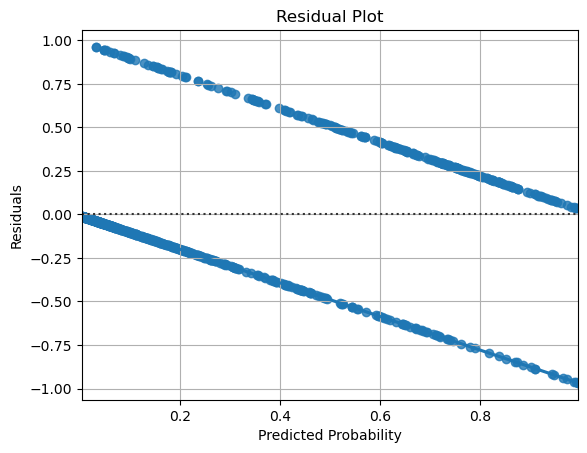

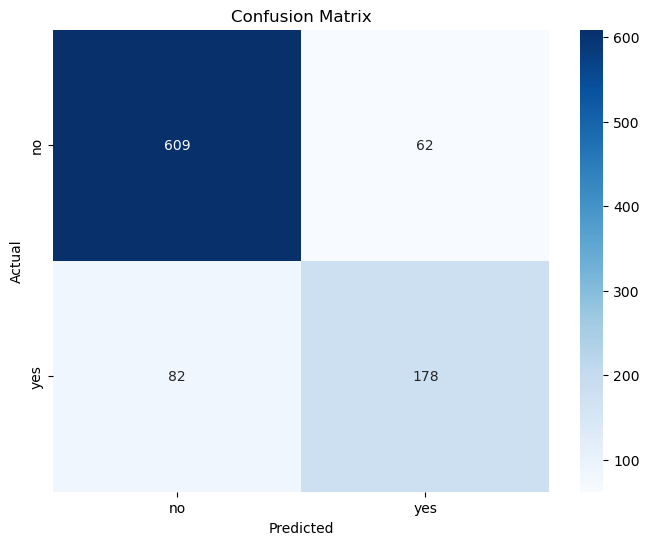

In [86]:
#Logistic Regression model with the stratified method:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('data/bank-additional-full.csv', sep=';')

# Drop rows with age equal to 0 
df = df[df['age'] != 0] 

# Drop rows with 'unknown' values in any column 
df = df[~df.isin(['unknown']).any(axis=1)]

# Remove periods from the 'education' field
df['education'] = df['education'].str.replace('.', '', regex=False)

# Filter out rows with 'illiterate' value in the 'education' field
df = df[df['education'] != 'illiterate']

# Filter the data to include only conclusive results
df = df[df['poutcome'].isin(['success', 'failure'])]

# Encode the target variable
label_encoder = LabelEncoder()
df['y'] = label_encoder.fit_transform(df['y'])

# Define features and target
X = df.iloc[:, 0:20]
y = df.iloc[:, 20]

# Split data into training and testing sets using stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=X['education'], random_state=42)

# Define the numeric and categorical columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Create the column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Create the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Predict on the test data
y_pred = pipeline.predict(X_test)
y_proba = pipeline.predict_proba(X_test)[:, 1]

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred, zero_division=0)

print(f'Mean Squared Error: {mse:.4f}')
print(f'R-squared: {r2:.4f}')
print(f'Accuracy: {accuracy:.4f}')
print('\nClassification Report:\n', cr)

# Residual plot
residuals = y_test - y_proba
# Remove invalid values
valid_idx = ~np.isnan(residuals) & ~np.isnan(y_proba) & np.isfinite(residuals) & np.isfinite(y_proba)
residuals = residuals[valid_idx]
y_proba = y_proba[valid_idx]

sns.residplot(x=y_proba, y=residuals, lowess=True)
plt.xlabel('Predicted Probability')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.show()

# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



### Problem 9: Score the Model

What is the accuracy of your model?

Mean Squared Error: 0.1547
R-squared: 0.2315
Accuracy: 0.8453

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.91      0.89       671
           1       0.74      0.68      0.71       260

    accuracy                           0.85       931
   macro avg       0.81      0.80      0.80       931
weighted avg       0.84      0.85      0.84       931

Note: Noticed the residual plot is rational. I've been adding these types of plots to all my models. Any unusual results are significant.

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [88]:
#function for classifier, table for performance. Added statify method and compared results. 

import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the data
df = pd.read_csv('data/bank-additional-full.csv', sep=';')

# Drop rows with age equal to 0 
df = df[df['age'] != 0] 

# Drop rows with 'unknown' values in any column 
df = df[~df.isin(['unknown']).any(axis=1)]

# Remove periods from the 'education' field
df['education'] = df['education'].str.replace('.', '', regex=False)

# Filter out rows with 'illiterate' value in the 'education' field
df = df[df['education'] != 'illiterate']

# Filter the data to include only conclusive results
df = df[df['poutcome'].isin(['success', 'failure'])]

# Encode the target variable
label_encoder = LabelEncoder()
df['y'] = label_encoder.fit_transform(df['y'])

# Define features and target
X = df.iloc[:, 0:20]
y = df.iloc[:, 20]

# Split data into training and testing sets using stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=X['education'], random_state=42)

# Define the numeric and categorical columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Create the column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Define classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Support Vector Machine': SVC(probability=True, random_state=42)
}

# Initialize results table
results = []

# Evaluate each classifier
for name, clf in classifiers.items():
    # Create pipeline
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', clf)
    ])
    
    # Measure training time
    start_time = time.time()
    pipeline.fit(X_train, y_train)
    train_time = time.time() - start_time
    
    # Predict on training and test data
    y_train_pred = pipeline.predict(X_train)
    y_test_pred = pipeline.predict(X_test)
    
    # Calculate accuracies
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    # Append results
    results.append({
        'Model': name,
        'Train Time': train_time,
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Display results
print(results_df)

                    Model  Train Time  Train Accuracy  Test Accuracy
0     Logistic Regression    0.045959        0.841935       0.845328
1     K-Nearest Neighbors    0.026209        0.871237       0.813104
2           Decision Tree    0.083535        1.000000       0.794844
3  Support Vector Machine    2.394350        0.877151       0.837809


1. Logistic Regression shows consistent performance between training and testing. Risidual plot looks good.

2. KNN has a higher training accuracy but a significant drop in test accuracy, indicating potential overfitting or sensitivity to data. Residual plot also shows problems.

3. Decision Tree achieves perfect training accuracy but suffers on test accuracy, indicating overfitting. Residual plot looks strange.

4. SVM performs well but has the longest training time, which might be a trade-off for its accuracy. Risidual plot looks good.

Mean Squared Error: 0.1869
R-squared: 0.0715
Accuracy: 0.8131

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.87      0.87       671
           1       0.67      0.67      0.67       260

    accuracy                           0.81       931
   macro avg       0.77      0.77      0.77       931
weighted avg       0.81      0.81      0.81       931



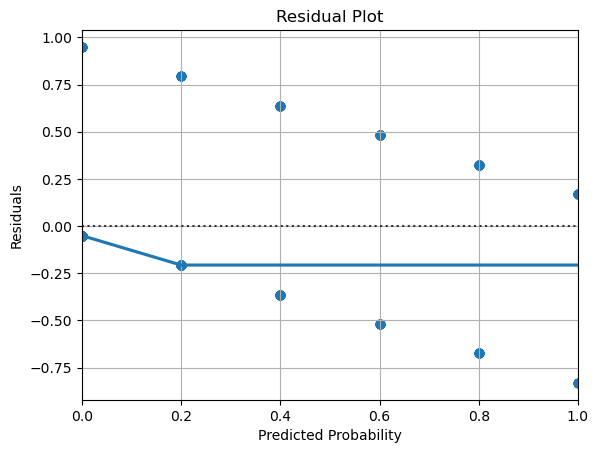

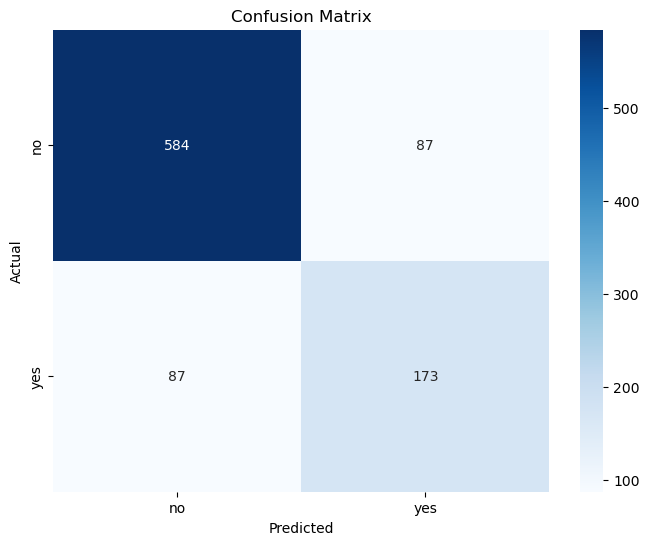

In [90]:
#Knn with stratified:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('data/bank-additional-full.csv', sep=';')

# Drop rows with age equal to 0 
df = df[df['age'] != 0] 

# Drop rows with 'unknown' values in any column 
df = df[~df.isin(['unknown']).any(axis=1)]

# Remove periods from the 'education' field
df['education'] = df['education'].str.replace('.', '', regex=False)

# Filter out rows with 'illiterate' value in the 'education' field
df = df[df['education'] != 'illiterate']

# Filter the data to include only conclusive results
df = df[df['poutcome'].isin(['success', 'failure'])]

# Encode the target variable
label_encoder = LabelEncoder()
df['y'] = label_encoder.fit_transform(df['y'])

# Define features and target
X = df.iloc[:, 0:20]
y = df.iloc[:, 20]

# Split data into training and testing sets using stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=X['education'], random_state=42)

# Define the numeric and categorical columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Create the column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Create the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=5))
])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Predict on the test data
y_pred = pipeline.predict(X_test)
y_proba = pipeline.predict_proba(X_test)[:, 1]

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred, zero_division=0)

print(f'Mean Squared Error: {mse:.4f}')
print(f'R-squared: {r2:.4f}')
print(f'Accuracy: {accuracy:.4f}')
print('\nClassification Report:\n', cr)

# Residual plot
residuals = y_test - y_proba
# Remove invalid values
valid_idx = ~np.isnan(residuals) & ~np.isnan(y_proba) & np.isfinite(residuals) & np.isfinite(y_proba)
residuals = residuals[valid_idx]
y_proba = y_proba[valid_idx]

sns.residplot(x=y_proba, y=residuals, lowess=True)
plt.xlabel('Predicted Probability')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.show()

# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Mean Squared Error: 0.2052
R-squared: -0.0193
Accuracy: 0.7948

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.85      0.86       671
           1       0.63      0.65      0.64       260

    accuracy                           0.79       931
   macro avg       0.75      0.75      0.75       931
weighted avg       0.80      0.79      0.80       931



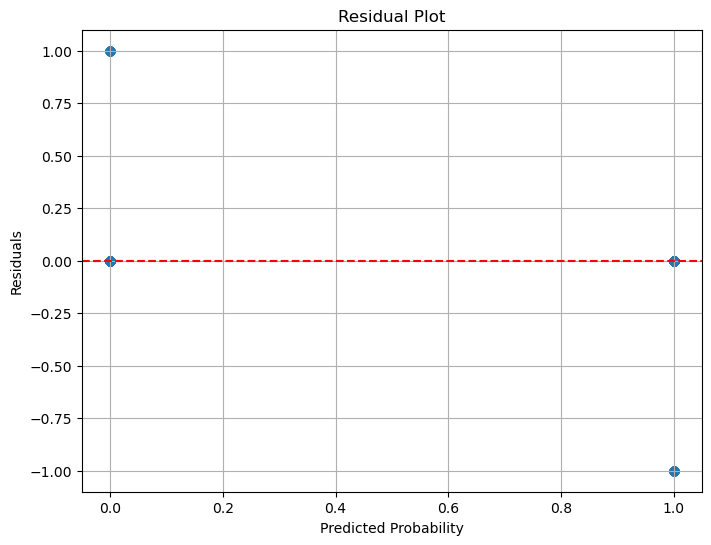

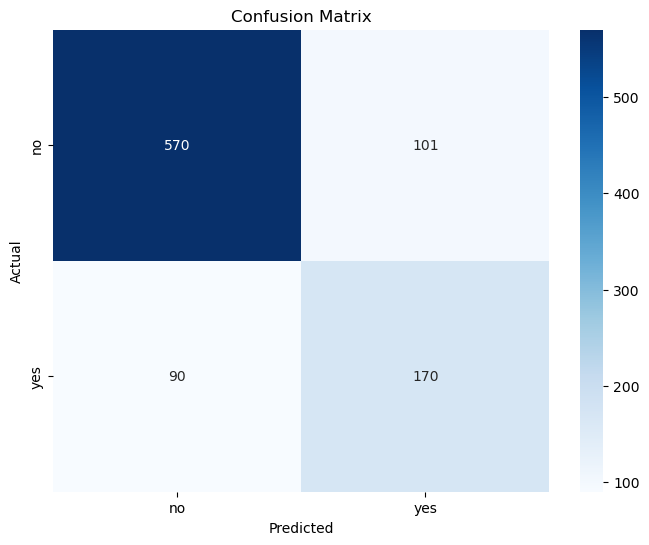

In [104]:
#Decision Tree with stratification method, modify the residual plot for errors.

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('data/bank-additional-full.csv', sep=';')

# Drop rows with age equal to 0 
df = df[df['age'] != 0] 

# Drop rows with 'unknown' values in any column 
df = df[~df.isin(['unknown']).any(axis=1)]

# Remove periods from the 'education' field
df['education'] = df['education'].str.replace('.', '', regex=False)

# Filter out rows with 'illiterate' value in the 'education' field
df = df[df['education'] != 'illiterate']

# Filter the data to include only conclusive results
df = df[df['poutcome'].isin(['success', 'failure'])]

# Encode the target variable
label_encoder = LabelEncoder()
df['y'] = label_encoder.fit_transform(df['y'])

# Define features and target
X = df.iloc[:, 0:20]
y = df.iloc[:, 20]

# Split data into training and testing sets using stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=X['education'], random_state=42)

# Define the numeric and categorical columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Create the column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Create the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Predict on the test data
y_pred = pipeline.predict(X_test)
y_proba = pipeline.predict_proba(X_test)[:, 1]

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred, zero_division=0)

print(f'Mean Squared Error: {mse:.4f}')
print(f'R-squared: {r2:.4f}')
print(f'Accuracy: {accuracy:.4f}')
print('\nClassification Report:\n', cr)

# Ensure predicted probabilities are within the valid range [0, 1]
y_proba = np.clip(y_proba, 0, 1)

# Calculate residuals
residuals = y_test - y_proba

# Create the residual plot without LOWESS smoothing
plt.figure(figsize=(8, 6))
plt.scatter(y_proba, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Probability')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.show()

# Confusion Matrix 
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Mean Squared Error: 0.1622
R-squared: 0.1942
Accuracy: 0.8378

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.90      0.89       671
           1       0.72      0.69      0.70       260

    accuracy                           0.84       931
   macro avg       0.80      0.79      0.80       931
weighted avg       0.84      0.84      0.84       931



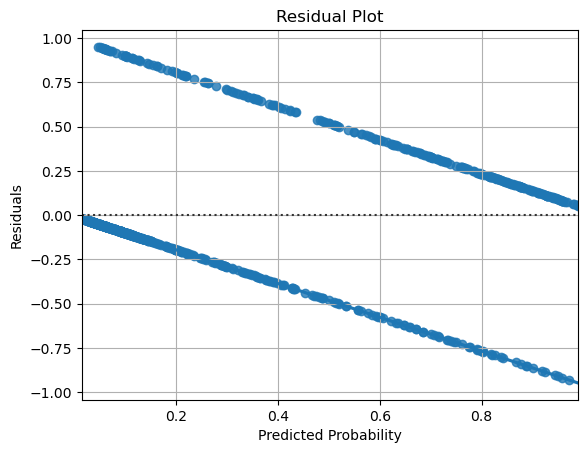

In [96]:
#SVC Classifier with stratification

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('data/bank-additional-full.csv', sep=';')

# Drop rows with age equal to 0 
df = df[df['age'] != 0] 

# Drop rows with 'unknown' values in any column 
df = df[~df.isin(['unknown']).any(axis=1)]

# Remove periods from the 'education' field
df['education'] = df['education'].str.replace('.', '', regex=False)

# Filter out rows with 'illiterate' value in the 'education' field
df = df[df['education'] != 'illiterate']

# Filter the data to include only conclusive results
df = df[df['poutcome'].isin(['success', 'failure'])]

# Encode the target variable
label_encoder = LabelEncoder()
df['y'] = label_encoder.fit_transform(df['y'])

# Define features and target
X = df.iloc[:, 0:20]
y = df.iloc[:, 20]

# Split data into training and testing sets using stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=X['education'], random_state=42)

# Define the numeric and categorical columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Create the column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Create the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(probability=True, random_state=42))
])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Predict on the test data
y_pred = pipeline.predict(X_test)
y_proba = pipeline.predict_proba(X_test)[:, 1]

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred, zero_division=0)

print(f'Mean Squared Error: {mse:.4f}')
print(f'R-squared: {r2:.4f}')
print(f'Accuracy: {accuracy:.4f}')
print('\nClassification Report:\n', cr)

# Residual plot
residuals = y_test - y_proba
# Remove invalid values
valid_idx = ~np.isnan(residuals) & ~np.isnan(y_proba) & np.isfinite(residuals) & np.isfinite(y_proba)
residuals = residuals[valid_idx]
y_proba = y_proba[valid_idx]

sns.residplot(x=y_proba, y=residuals, lowess=True)
plt.xlabel('Predicted Probability')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.show()

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

Best Parameters: {'classifier__max_depth': 10}
Best Estimator: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'duration',
                                                   'campaign', 'pdays',
                                                   'previous', 'emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx', 'euribor3m',
                                                   'nr.employed']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                  

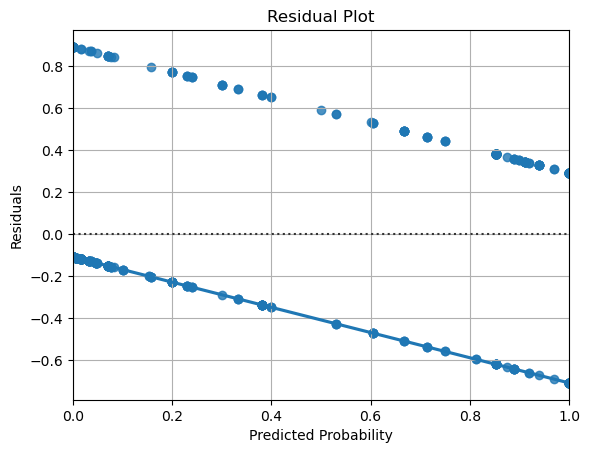

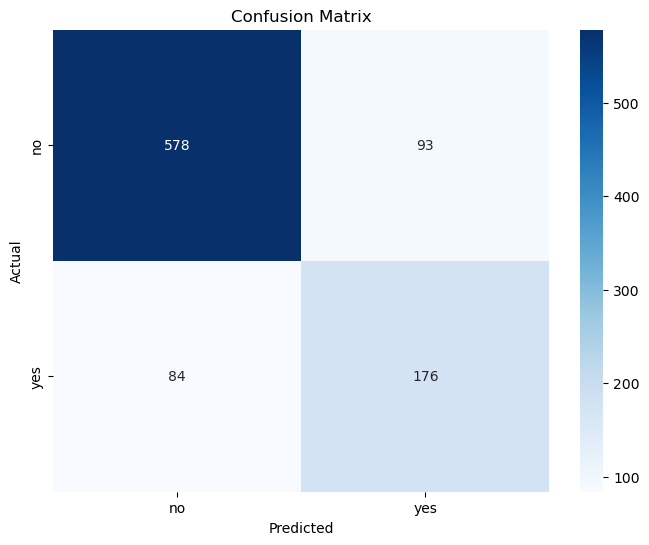

In [110]:
#Decision Tree hyper paramter tuning 

import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('data/bank-additional-full.csv', sep=';')

# Drop rows with age equal to 0 
df = df[df['age'] != 0] 

# Drop rows with 'unknown' values in any column 
df = df[~df.isin(['unknown']).any(axis=1)]

# Remove periods from the 'education' field
df['education'] = df['education'].str.replace('.', '', regex=False)

# Filter out rows with 'illiterate' value in the 'education' field
df = df[df['education'] != 'illiterate']

# Filter the data to include only conclusive results
df = df[df['poutcome'].isin(['success', 'failure'])]

# Encode the target variable
label_encoder = LabelEncoder()
df['y'] = label_encoder.fit_transform(df['y'])

# Define features and target
X = df.iloc[:, 0:20]
y = df.iloc[:, 20]

# Split data into training and testing sets using stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=X['education'], random_state=42)

# Define the numeric and categorical columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Create the column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Create the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Define the parameter grid
param_grid = {
    'classifier__max_depth': [None, 10, 20, 30, 40, 50]
}

# Measure training time
start_time = time.time()

# Perform GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)
train_time = time.time() - start_time

# Best parameters and estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print(f"Best Parameters: {best_params}")
print(f"Best Estimator: {best_estimator}")

# Predict on training and test data using the best estimator
y_train_pred = best_estimator.predict(X_train)
y_test_pred = best_estimator.predict(X_test)
y_proba = best_estimator.predict_proba(X_test)[:, 1]

# Calculate accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print Train Time, Train Accuracy, and Test Accuracy
print(f'Train Time: {train_time:.4f} seconds')
print(f'Train Accuracy: {train_accuracy:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

# Evaluate the model
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)
cm = confusion_matrix(y_test, y_test_pred)
cr = classification_report(y_test, y_test_pred, zero_division=0)

print(f'Mean Squared Error: {mse:.4f}')
print(f'R-squared: {r2:.4f}')
print(f'Accuracy: {test_accuracy:.4f}')
print('\nClassification Report:\n', cr)

# Ensure predicted probabilities are within the valid range [0, 1]
y_proba = np.clip(y_proba, 0, 1)

# Remove invalid values
residuals = y_test - y_proba
valid_idx = ~np.isnan(residuals) & ~np.isnan(y_proba) & np.isfinite(residuals) & np.isfinite(y_proba)
residuals = residuals[valid_idx]
y_proba = y_proba[valid_idx]

# Check for any remaining invalid values
if len(residuals) == 0 or len(y_proba) == 0:
    print("No valid data for residual plot")
else:
    sns.residplot(x=y_proba, y=residuals, lowess=True)
    plt.xlabel('Predicted Probability')
    plt.ylabel('Residuals')
    plt.title('Residual Plot')
    plt.grid(True)
    plt.show()

# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Best Parameters: {'classifier__n_neighbors': 17}
Best Estimator: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'duration',
                                                   'campaign', 'pdays',
                                                   'previous', 'emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx', 'euribor3m',
                                                   'nr.employed']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                

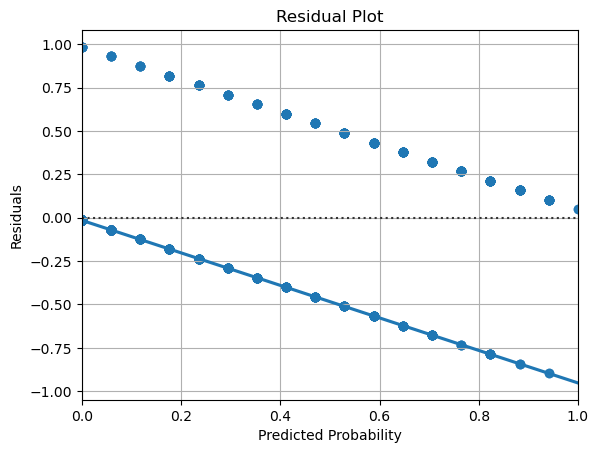

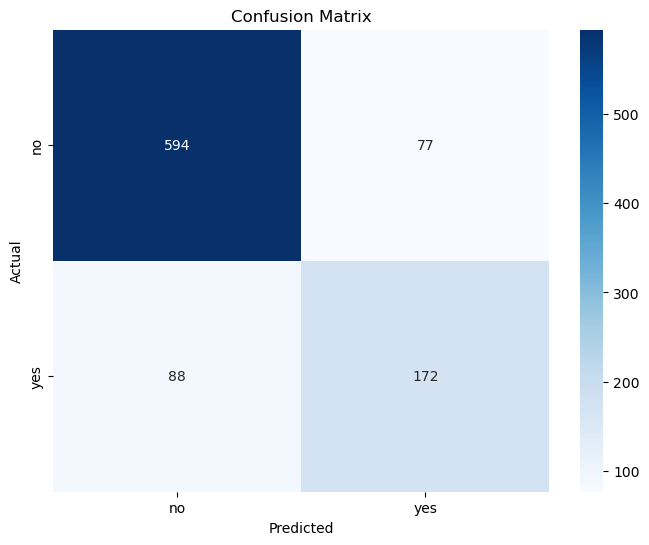

In [112]:
#Knn hyper paratmer tuning

import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('data/bank-additional-full.csv', sep=';')

# Drop rows with age equal to 0 
df = df[df['age'] != 0] 

# Drop rows with 'unknown' values in any column 
df = df[~df.isin(['unknown']).any(axis=1)]

# Remove periods from the 'education' field
df['education'] = df['education'].str.replace('.', '', regex=False)

# Filter out rows with 'illiterate' value in the 'education' field
df = df[df['education'] != 'illiterate']

# Filter the data to include only conclusive results
df = df[df['poutcome'].isin(['success', 'failure'])]

# Encode the target variable
label_encoder = LabelEncoder()
df['y'] = label_encoder.fit_transform(df['y'])

# Define features and target
X = df.iloc[:, 0:20]
y = df.iloc[:, 20]

# Split data into training and testing sets using stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=X['education'], random_state=42)

# Define the numeric and categorical columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Create the column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Create the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])

# Define the parameter grid
param_grid = {
    'classifier__n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21]
}

# Measure training time
start_time = time.time()

# Perform GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)
train_time = time.time() - start_time

# Best parameters and estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print(f"Best Parameters: {best_params}")
print(f"Best Estimator: {best_estimator}")

# Predict on training and test data using the best estimator
y_train_pred = best_estimator.predict(X_train)
y_test_pred = best_estimator.predict(X_test)
y_proba = best_estimator.predict_proba(X_test)[:, 1]

# Calculate accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print Train Time, Train Accuracy, and Test Accuracy
print(f'Train Time: {train_time:.4f} seconds')
print(f'Train Accuracy: {train_accuracy:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

# Evaluate the model
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)
cm = confusion_matrix(y_test, y_test_pred)
cr = classification_report(y_test, y_test_pred, zero_division=0)

print(f'Mean Squared Error: {mse:.4f}')
print(f'R-squared: {r2:.4f}')
print(f'Accuracy: {test_accuracy:.4f}')
print('\nClassification Report:\n', cr)

# Ensure predicted probabilities are within the valid range [0, 1]
y_proba = np.clip(y_proba, 0, 1)

# Remove invalid values
valid_idx = ~np.isnan(residuals) & ~np.isnan(y_proba) & np.isfinite(residuals) & np.isfinite(y_proba)
residuals = y_test - y_proba
residuals = residuals[valid_idx]
y_proba = y_proba[valid_idx]

# Check for any remaining invalid values
if len(residuals) == 0 or len(y_proba) == 0:
    print("No valid data for residual plot")
else:
    sns.residplot(x=y_proba, y=residuals, lowess=True)
    plt.xlabel('Predicted Probability')
    plt.ylabel('Residuals')
    plt.title('Residual Plot')
    plt.grid(True)
    plt.show()

# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
                    Model  Train Time  Train Accuracy  Test Accuracy  MSE     R2
0     Logistic Regression    0.045959        0.841935       0.845328  0.1547  0.2315
1     K-Nearest Neighbors    0.026209        0.871237       0.813104  0.1869  0.0715
2           Decision Tree    0.083535        1.000000       0.794844  0.2052  -0.0193
3  Support Vector Machine    2.394350        0.877151       0.837809  0.1622  0.1942
4 K-Nearest Neighbors(17)    1.159600        0.834700       0.822800  0.1772  0.1195
5      Decision Tree (10)    5.787100        0.941900       0.809900  0.1901  0.0554
6           BaselineDummy    0.001000        0.723900       0.720700  0.2793  -0.3875
7           SimpleImputer  25397.3509        0.918800       0.912500  0.0875  0.1041

Upon analyzing the performance of various models and their hyper-tuned counterparts, I observe the following insights:

Logistic Regression:
Train Time: Quickest at approximately 0.046 seconds.
Train Accuracy: 84.19%
Test Accuracy: Highest at 84.53%
MSE: 0.1547
R²: 0.2315
Summary: Logistic Regression stands out with a balance of high test accuracy, low mean squared error (MSE), and a respectable R² value, making it the most reliable model out of the box.

K-Nearest Neighbors (KNN):
Initial Model:
Train Time: 0.026 seconds
Train Accuracy: 87.12%
Test Accuracy: 81.31%
MSE: 0.1869
R²: 0.0715

Hyper-Tuned Model (n_neighbors=17):
Train Time: 1.16 seconds
Train Accuracy: 83.47%
Test Accuracy: Improved to 82.28%
MSE: 0.1772
R²: 0.1195
Summary: The hyper-tuned KNN model shows improvements in both test accuracy and residual plots, though at a cost of increased training time.

Decision Tree:
Initial Model:
Train Time: 0.084 seconds
Train Accuracy: 100% (overfitting)
Test Accuracy: 79.48%
MSE: 0.2052
R²: -0.0193

Hyper-Tuned Model (max_depth=10):
Train Time: 5.79 seconds
Train Accuracy: 94.19%
Test Accuracy: Improved to 80.99%
MSE: 0.1901
R²: 0.0554
Summary: The hyper-tuned Decision Tree model reduces overfitting, resulting in better test accuracy and more stable residual plots, albeit with longer training time.

Support Vector Machine (SVM):
Train Time: Longest at approximately 2.39 seconds
Train Accuracy: 87.72%
Test Accuracy: 83.78%
MSE: 0.1622
R²: 0.1942
Summary: SVM provides good performance but at the expense of significantly longer training times.

Every model evaluated, including their hyper-tuned versions, outperforms the baseline dummy classifier significantly in terms of accuracy and error metrics. The hyper-tuned versions of K-Nearest Neighbors and Decision Tree models, in particular, show improved performance and stability. Logistic Regression and SVM also provide strong results, making them good choices depending on the specific application requirements. This demonstrates the effectiveness of these models over a simple dummy classifier in predicting outcomes with greater accuracy and reliability.

Logistic Regression and SVM show strong performance with relatively high test accuracy and low MSE. However, hyper-tuning KNN and Decision Tree models also yield improved residual plots and better generalization, highlighting the importance of model optimization. Each model has its trade-offs between training time, accuracy, and complexity, allowing for flexibility depending on the specific application requirements.

Post-work exercise attempting SimpleImputer on unknown values shows slight scoring improvements but significant training time of 7 hours. Other classifiers without Impute showed similer scoring. Using SimpleImputer might not be worth the tradeoff of significant training time for slight scoring improvements.

Readme
https://github.com/jasonbreimer/ogma/tree/main/module17

Goal:
The objective of this project is to compare the performance of various classifiers, namely K-Nearest Neighbors, Logistic Regression, Decision Trees, and Support Vector Machines, using a dataset related to marketing bank products over the telephone. The dataset encompasses 17 campaigns conducted between May 2008 and November 2010, totaling 79,354 contacts.

Data Preparation and Cleaning

Round 1: Data Cleaning

Filtering poutcome Values: Only included 'failure' and 'success'.
Removing sex Column: As it had minimal importance. **This had already been done but noted from White Paper.

Additional Cleaning Steps:
Filtered out rows with zero age.
Removed rows with 'unknown' values. **Post-Work excecise attempts simple impute
Removed periods from education values to avoid potential issues.

Round 2: Data Preparation

Handling Unseen Values in education:
Introduced stratification on education during the train-test split to ensure balanced representation:

Performance Improvements Noted:
Accuracy: Improved from 83.29% to 85.42%.
Mean Squared Error (MSE): Decreased from 0.1671 to 0.1458.
R-squared (R²): Improved from 0.1924 to 0.2432.
Class 0: Slight improvements in precision, recall, and F1-score.
Class 1: Slight decrease in recall, but overall performance remained similar.

Handling 'illiterate' Value:
As the 'illiterate' value had only one sample, it was dropped to avoid issues with stratification.

Overall Conclusion
Every model evaluated, including their hyper-tuned versions, outperforms the baseline dummy classifier significantly in terms of accuracy and error metrics. The hyper-tuned versions of K-Nearest Neighbors and Decision Tree models, in particular, show improved performance and stability. Logistic Regression and SVM also provide strong results, making them reliable choices depending on the specific application requirements. This demonstrates the effectiveness of these models over a simple dummy classifier in predicting outcomes with greater accuracy and reliability.

Logistic Regression and SVM show strong performance with relatively high test accuracy and low MSE. However, hyper-tuning KNN and Decision Tree models also yield improved residual plots and better generalization, highlighting the importance of model optimization. Each model has its trade-offs between training time, accuracy, and complexity, allowing for flexibility depending on the specific application requirements.

An interesting follow up exercise would be to try and impute unknown values. See the Post-Work section in the Jupyter Notebook.

Post-Work Summary:
The model demonstrated strong performance metrics across both training and testing sets. It achieved a training accuracy of 91.88% and a testing accuracy of 91.25%. Additionally, the training process, although computationally intensive, took approximately 7 hours.

In terms of prediction accuracy and error metrics, the mean squared error (MSE) was 0.0875, while the R-squared value stood at 0.1041. These values indicate a reasonable level of prediction accuracy, though with some room for improvement in explaining the variance in the data.

The classification report highlighted a high overall accuracy of 91.25%, with class 0 (the majority class) showing excellent precision, recall, and F1-score of 0.93, 0.97, and 0.95, respectively. Class 1, although underrepresented, managed to achieve a precision of 0.66, recall of 0.41, and F1-score of 0.51. The macro average scores, which consider the balance between the classes, were 0.80 for precision, 0.69 for recall, and 0.73 for F1-score. Weighted averages, which account for the support of each class, were similarly strong, reinforcing the model's balanced performance. 

Post-work exercise attempting SimpleImputer on unknown values shows slight scoring improvements but significant training time of 7 hours. Other classifiers without Impute showed similer scoring. Using SimpleImputer might not be worth the tradeoff of significant training time for slight scoring improvements.

                    Model  Train Time  Train Accuracy  Test Accuracy  MSE     R2
0     Logistic Regression    0.045959        0.841935       0.845328  0.1547  0.2315
1     K-Nearest Neighbors    0.026209        0.871237       0.813104  0.1869  0.0715
2           Decision Tree    0.083535        1.000000       0.794844  0.2052  -0.0193
3  Support Vector Machine    2.394350        0.877151       0.837809  0.1622  0.1942
4 K-Nearest Neighbors(17)    1.159600        0.834700       0.822800  0.1772  0.1195
5      Decision Tree (10)    5.787100        0.941900       0.809900  0.1901  0.0554
6           BaselineDummy    0.001000        0.723900       0.720700  0.2793  -0.3875
7           SimpleImputer  25397.3509        0.918800       0.912500  0.0875  0.1041

In [ ]:
Post-Work Impute

Best Parameters: {'classifier__C': 10, 'classifier__gamma': 0.01, 'classifier__kernel': 'rbf'}
Best Estimator: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'duration',
                                                   'campaign', 'pdays',
                                                   'previous', 'emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx', 'euribor3m',
                                                   'nr.employed']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   

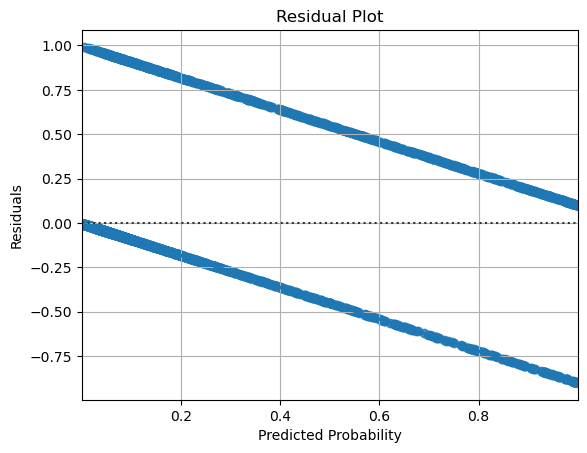

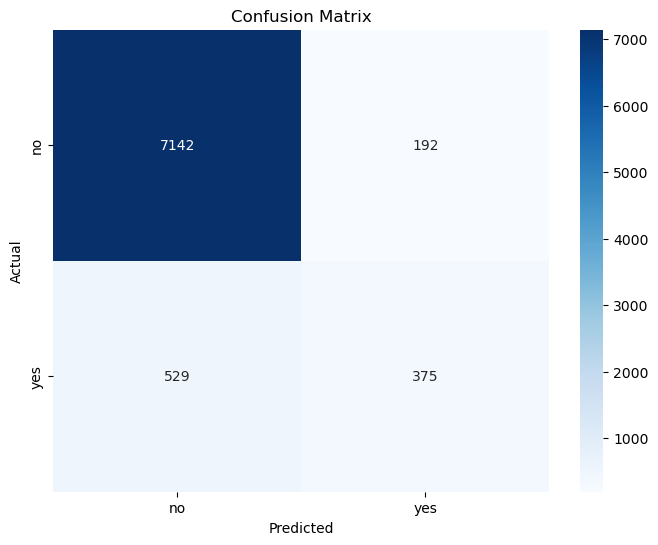

In [5]:
#Post work attempt a simple impute to improve model scoring. 

import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('data/bank-additional-full.csv', sep=';')

# Drop rows with age equal to 0 
df = df[df['age'] != 0] 

# Impute missing values in numeric columns with the median
numeric_imputer = SimpleImputer(strategy='median')
df[df.select_dtypes(include=['int64', 'float64']).columns] = numeric_imputer.fit_transform(df.select_dtypes(include=['int64', 'float64']))

# Impute missing values in categorical columns with the most frequent value
categorical_imputer = SimpleImputer(strategy='most_frequent')
df[df.select_dtypes(include=['object']).columns] = categorical_imputer.fit_transform(df.select_dtypes(include=['object']))

# Remove periods from the 'education' field
df['education'] = df['education'].str.replace('.', '', regex=False)

# Filter out rows with 'illiterate' value in the 'education' field
df = df[df['education'] != 'illiterate']

# Filter the data to include only conclusive results
df = df[df['poutcome'].isin(['success', 'failure'])]

# Encode the target variable
label_encoder = LabelEncoder()
df['y'] = label_encoder.fit_transform(df['y'])

# Define features and target
X = df.iloc[:, 0:20]
y = df.iloc[:, 20]

# Split data into training and testing sets using stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=X['education'], random_state=42)

# Define the numeric and categorical columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Create the column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Create the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(probability=True, random_state=42))
])

# Define the parameter grid for hyper-tuning
param_grid = {
    'classifier__C': [0.1, 1, 10, 100],
    'classifier__gamma': [1, 0.1, 0.01, 0.001],
    'classifier__kernel': ['rbf', 'linear']
}

# Measure training time
start_time = time.time()

# Perform GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)
train_time = time.time() - start_time

# Best parameters and estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print(f"Best Parameters: {best_params}")
print(f"Best Estimator: {best_estimator}")

# Predict on training and test data using the best estimator
y_train_pred = best_estimator.predict(X_train)
y_test_pred = best_estimator.predict(X_test)
y_proba = best_estimator.predict_proba(X_test)[:, 1]

# Calculate accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print Train Time, Train Accuracy, and Test Accuracy
print(f'Train Time: {train_time:.4f} seconds')
print(f'Train Accuracy: {train_accuracy:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

# Evaluate the model
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)
cm = confusion_matrix(y_test, y_test_pred)
cr = classification_report(y_test, y_test_pred, zero_division=0)

print(f'Mean Squared Error: {mse:.4f}')
print(f'R-squared: {r2:.4f}')
print(f'Accuracy: {test_accuracy:.4f}')
print('\nClassification Report:\n', cr)

# Residual plot
residuals = y_test - y_proba
# Remove invalid values
valid_idx = ~np.isnan(residuals) & ~np.isnan(y_proba) & np.isfinite(residuals) & np.isfinite(y_proba)
residuals = residuals[valid_idx]
y_proba = y_proba[valid_idx]

sns.residplot(x=y_proba, y=residuals, lowess=True)
plt.xlabel('Predicted Probability')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.show()

# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



##### Questions